## 导入数据及预处理

In [1]:
import pandas as pd
import numpy as np

In [ ]:
def preprocess_abundance(abu, level):
    abu = abu.T # 转置
    abu = abu.loc[:,abu.sum(axis=0) > 0] # 去除全为0的特征
    abu.columns = abu.columns.str.split(';', expand=True) # 将分类信息拆分为多列
    abu.columns = abu.columns.get_level_values(level) # 选择指定层级的分类信息
    abu = abu.loc[:,abu.columns.notnull()] # 去除分类信息为空的特征
    abu = abu.groupby(abu.columns, axis=1).sum() # 按分类信息聚合
    return abu
    

导入数据

In [3]:
X_train = pd.read_csv('data/SourceCM.csv', index_col=0)
X_test = pd.read_csv('data/QueryCM.csv', index_col=0)
y_test = pd.read_csv('data/QueryLabel.csv', index_col=0)
y_train = pd.read_csv('data/SourceLabel.csv', index_col=0)

In [4]:
X_train.describe()

,ERR1583385,SRR1179327,ERR2725605,SRR1930725,ERR1582517,SRR5002888,ERR2816769,SRR3633495,SRR1179400,SRR5185957,...,ERR2842512,SRR6464907,SRR6507601,SRR5287300,SRR5188799,SRR5433944,SRR6979560,ERZ1026917,SRR5189471,DRR161763
count,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,...,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000,22264.000000
mean,0.827839,0.069484,12.233067,0.068092,3.525871,1.850925,0.508489,10.392248,0.088124,0.821416,...,2.433570,11.569664,0.915649,2.242364,1.022952,2.172655,1.407384,0.001527,0.261948,4.296622
std,37.482177,4.810983,1074.944411,7.912178,109.927733,126.267472,30.164713,457.971651,5.847863,55.633609,...,176.537092,487.568618,53.407367,142.308668,134.154945,148.418884,31.414896,0.065649,13.749833,197.344444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4943.000000,661.000000,156303.000000,1175.000000,10484.000000,17821.000000,3547.000000,42734.000000,815.000000,6712.000000,...,22301.000000,47513.000000,5582.000000,16619.000000,19995.000000,18688.000000,2528.000000,7.000000,1567.000000,21015.000000


丰度表预处理

In [5]:
X_train = preprocess_abundance(X_train, 5)  # 保留到属
X_test = preprocess_abundance(X_test, 5)  # 保留到属

C:\Users\26638\AppData\Local\Temp\ipykernel_38184\805183115.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  abu = abu.groupby(abu.columns, axis=1).sum() # 按分类信息聚合\
C:\Users\26638\AppData\Local\Temp\ipykernel_38184\805183115.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  abu = abu.groupby(abu.columns, axis=1).sum() # 按分类信息聚合\


In [6]:
X_test = pd.concat([pd.DataFrame(columns=X_train.columns), X_test], join='outer', axis=0).fillna(0)  # 特征对齐
X_test = X_test[X_train.columns]

X_train = X_train.div(X_train.sum(axis=1), axis=0)  # 相对丰度
X_test = X_test.div(X_test.sum(axis=1), axis=0) # 相对丰度

C:\Users\26638\AppData\Local\Temp\ipykernel_38184\3161395271.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = pd.concat([pd.DataFrame(columns=X_train.columns), X_test], join='outer', axis=0).fillna(0)  # 特征对齐


In [7]:
X_train.head()

,g__,g__Abiotrophia,g__Acanthamoeba,g__Acanthometra,g__Acanthopleuribacter,g__Acarothrix,g__Acartia,g__Acaryochloris,g__Acetanaerobacterium,g__Acetatifactor,...,g__Zhihengliuella,g__Zhongshania,g__Zobellella,g__Zobellia,g__Zoogloea,g__Zooshikella,g__Zoothamnium,g__Zosterodasys,g__Zunongwangia,g__Zymomonas
ERR1583385,0.000995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
SRR1179327,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
ERR2725605,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
SRR1930725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
ERR1582517,0.002837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000039,0.0,0.0,0.0,0.0,0.0


利用训练集的丰度表进行标准化

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

标签预处理

In [9]:
y_train = y_train['Env'].str.split(':', expand=True)    # 样本来源分层
y_train = y_train.drop(columns=[0]) # 去除root
y_test = y_test['Env'].str.split(':', expand=True)    # 样本来源分层
y_test = y_test.drop(columns=[0]) # 去除root

In [10]:
y_train.head()

,1,2,3,4,5
ERR1583385,Environmental,Aquatic,Freshwater,Wetlands,Bog
SRR1179327,Host-associated,Mammals,Digestive system,Stomach,Rumen
ERR2725605,Host-associated,Mammals,Digestive system,Stomach,Rumen
SRR1930725,Environmental,Aquatic,Freshwater,Groundwater,Biofilm
ERR1582517,Environmental,Aquatic,Freshwater,Wetlands,Bog


## 模型构建

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder

def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    

seed_everything(0)

In [12]:
le = LabelEncoder()
le.fit_transform(y_train.iloc[:, -1])# 将分类标签编码为数字

array([ 1,  7,  7, ...,  4,  5, 10])

定义模型

In [13]:
class ImprovedNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout=0.3, activation='relu'):
        super(ImprovedNet, self).__init__()
        
        # 激活函数选择
        if activation == 'relu':
            act_fn = nn.ReLU()
        elif activation == 'leaky_relu':
            act_fn = nn.LeakyReLU(0.01)
        elif activation == 'gelu':
            act_fn = nn.GELU()
        else:
            raise ValueError(f"Unsupported activation: {activation}")
        
        layers = []
        in_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.BatchNorm1d(h))
            layers.append(act_fn)
            layers.append(nn.Dropout(dropout))
            in_size = h
        
        layers.append(nn.Linear(in_size, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


构建模型

In [14]:
input_size = X_train.shape[1]
hidden_sizes = [256, 128, 64]
num_classes = len(le.classes_)

model = ImprovedNet(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    num_classes=num_classes,
    dropout=0.3,
    activation='relu'
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(init_weights) # 权重初始化

ImprovedNet(
  (net): Sequential(
    (0): Linear(in_features=2870, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=11, bias=True)
  )
)

准备数据集

In [15]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(le.transform(y_train.iloc[:, -1]), dtype=torch.long)

train_set = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

定义训练函数

In [16]:
def train(model, criterion, optimizer, train_loader, num_epochs):
    device =  torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
    print(f'Using {device}')
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for X, y in train_loader:
            optimizer.zero_grad()   # 梯度清零
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = criterion(y_pred, y) #   计算损失
            total_loss += loss.item()
            loss.backward() # 反向传播
            optimizer.step()    # 更新参数
        
        print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}')

训练模型

In [17]:
criterion = nn.CrossEntropyLoss()   # 交叉熵损失函数
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4) # AdamW优化器

train(model, criterion, optimizer, train_loader, 20)

Using cpu
Epoch 1, Loss: 2.391766711643764
Epoch 2, Loss: 1.5573975222451346
Epoch 3, Loss: 1.181368044444493
Epoch 4, Loss: 0.9258591038840157
Epoch 5, Loss: 0.7238589687006814
Epoch 6, Loss: 0.6147032150200435
Epoch 7, Loss: 0.4582066059112549
Epoch 8, Loss: 0.3963229788201196
Epoch 9, Loss: 0.32087659793240686
Epoch 10, Loss: 0.2986621047769274
Epoch 11, Loss: 0.2693097201841218
Epoch 12, Loss: 0.26193928186382565
Epoch 13, Loss: 0.24041691443749835
Epoch 14, Loss: 0.18281256631016732
Epoch 15, Loss: 0.18964526706508228
Epoch 16, Loss: 0.17224860223276275
Epoch 17, Loss: 0.16561614807162967
Epoch 18, Loss: 0.15793636866978236
Epoch 19, Loss: 0.1356274831507887
Epoch 20, Loss: 0.14950527123042515


## 评估

In [39]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_test, y_test_raw, label_encoder, plot_roc=True):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X_test, dtype=torch.float32)
        outputs = model(X_tensor)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

    y_true = label_encoder.transform(y_test_raw)
    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))

    print("Classification Report:")
    print(classification_report(y_true, preds, target_names=label_encoder.classes_))

    print(f"Accuracy: {accuracy_score(y_true, preds):.4f}")

    # 混淆矩阵
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, preds), annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # 多分类 ROC 曲线
    if plot_roc:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(label_encoder.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(8, 6))
        for i in range(len(label_encoder.classes_)):
            plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Multiclass ROC Curve")
        plt.legend(loc="lower right")
        plt.grid()
        plt.tight_layout()
        plt.show()

Classification Report:
               precision    recall  f1-score   support

      Biofilm       0.90      0.95      0.93        20
          Bog       0.95      0.95      0.95        20
        Cecum       1.00      0.85      0.92        20
   Coral reef       0.81      0.85      0.83        20
        Fecal       0.81      0.85      0.83        20
 Nasal cavity       0.71      0.75      0.73        20
      Pharynx       0.86      0.90      0.88        20
        Rumen       0.95      0.90      0.92        20
       Saliva       0.83      0.75      0.79        20
     Sediment       0.81      0.85      0.83        20
tongue dorsum       0.95      0.95      0.95        20

     accuracy                           0.87       220
    macro avg       0.87      0.87      0.87       220
 weighted avg       0.87      0.87      0.87       220

Accuracy: 0.8682


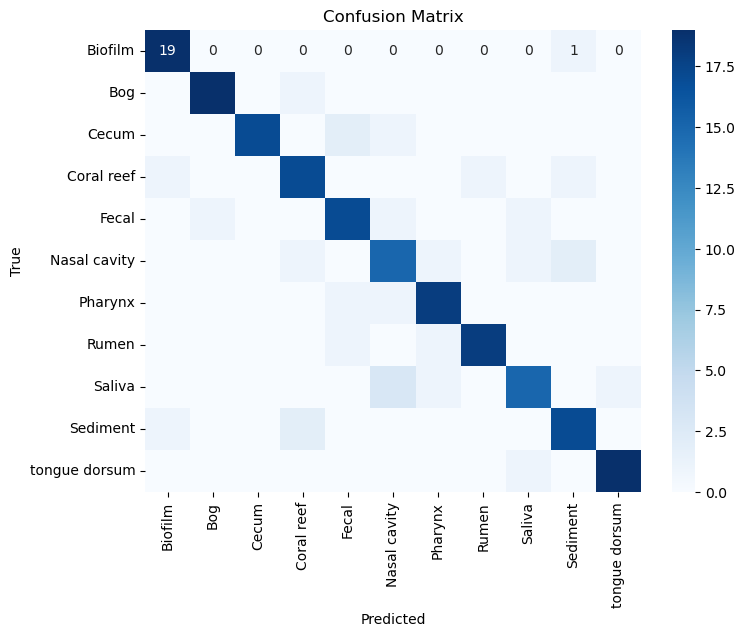

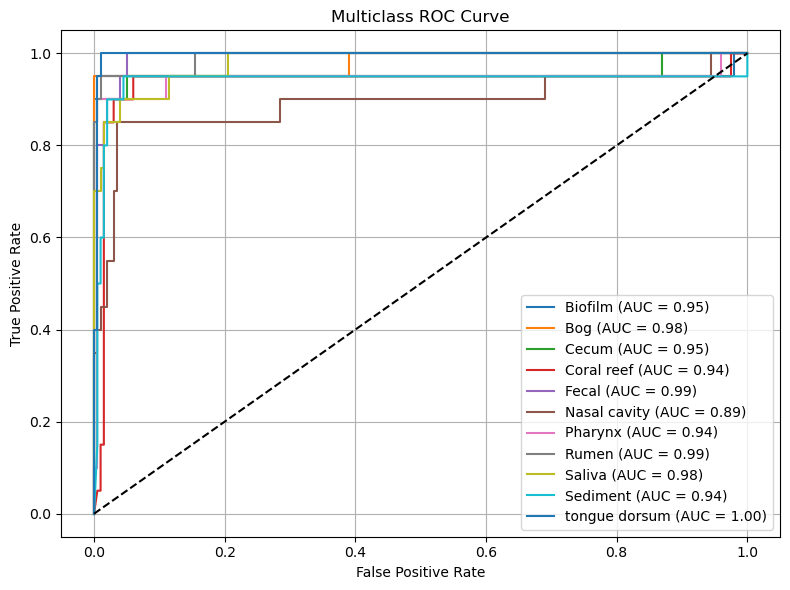

In [34]:
evaluate_model(
    model=model,
    X_test=X_test,
    y_test_raw=y_test.iloc[:, -1],
    label_encoder=le,
    plot_roc=True
)